## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [54]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [55]:
# Load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/property_dataset.csv')

df.head(5)
# Show top 5 rows of the data

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [56]:
# Describe data
df.describe()

# The standard deviations of the features suggest that there is considerable variation in the data for all features, particularly in 'luas tanah' and 'luas bangunan'
# The minimum and maximum values show a wide range in each feature. For example, the 'luas tanah' ranges from 14 m² to 1561 m²
# The 25%, 50%, and 75% percentiles (also known as quartiles) provide insights into the distribution of the data. It indicates a skewed distribution in features like 'luas tanah' and 'luas bangunan, while 'jumlah kamar' and 'jumlah kamar mandi' might be more evenly spread

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [57]:
# Show info
df.info()

# The DataFrame has 308 rows (entries) and 12 columns
# There are 5 columns with float64 data and 7 columns with object data
# The column with the most null values is 'Posisi Rumah' with 116 null values
# While 'Lebar Jalan Depan Rumah (ROW)' has 42 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [58]:
# Check for null values in the dataset

df.isnull().sum()
# In the dataset, there are 83 null values in 'arah hadap rumah', 116 null values in 'posisi rumah', 42 null values in 'lebar jalan depan rumah'
# And mostly 1 or 2 null values for the others

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [59]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

# Display the percentage of null values
null_percentage

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [60]:
# Initialize SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the DataFrame
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check the result by showing top 5 rows of the data
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [61]:
# Check for null values in the dataset

df.isnull().sum()
# There is no null values in the dataset now

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [62]:
# Dropping the column 'Nama Daerah' due to the large variety of values
df = df.drop('Nama Daerah', axis=1)

df.head(5)
# Show top 5 rows of the data

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [63]:
label_encoder = LabelEncoder()

area_category_map = {"Standard" : 3, "Below Standard": 4, "Sangat Premium": 1, "Premium": 2}
terjual_map = { "Belum": 1}
lebar_jalan_map = {"1-2 Mobil": 2, "< 1 Mobil":1, "> 2 Mobil": 3}
df['Area Category'] = df['Area Category'].map(area_category_map)
df['Terjual/Belum'] = df['Terjual/Belum'].map(terjual_map)
df['Arah Hadap Rumah'] = label_encoder.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = label_encoder.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_map)

# Show top 5 rows of the data
df.head()
# Encodes each categorical columns to numerical
# To make sure the result matches, some are mapped instead of encoded using label encoder

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [64]:
# Replace invalid values and use appropriate formats
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")

df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(r"[.,]", "", regex=True)

check the data type

In [65]:
# Show info
df.info()

# Now, the DataFrame has 308 rows (entries) and 11 columns
# There are 5 columns with int64 data and the other 6 is with object data
# All columns are free from null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [66]:
# Change datatype from object to int to ensure that all variables are in integer format
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(int)

In [67]:
# Show info
df.info()

# Now, the DataFrame has 308 rows (entries) and 11 columns
# All columns are with int64 data
# All columns are free from null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [68]:
# scaling data
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

df.head(5)
# Show top 5 rows of the data

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

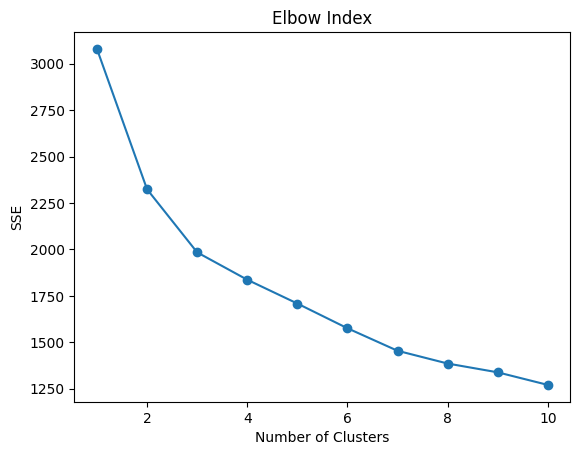

In [69]:
# K-Means Clustering
sse=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")

plt.show()
# Use 'elbow method' to help determine how many clusters are optimal in order to identify the point where the SSE starts to decrease more slowly
# This point is regarded as the ideal number of clusters, as incorporating additional clusters beyond this stage does not substantially enhance the fit and instead adds complexity

In [70]:
from kneed import KneeLocator

# Create an instance of KneeLocator to identify the optimal number of clusters
findknee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee

print("the best k for your model is", best_k)
# This algorithm assists in determining the most suitable number of clusters, supporting the earlier statement.

the best k for your model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [71]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)

# Training the KMeans model for clustering with the number of clusters set to 3
# This aims to group the data into distinct clusters or categories

In [72]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=df.columns)

df['KMeans'] = y_pred

df.head(5)
# Show top 5 rows of the data

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [73]:
# aggregation

cluster_summary = df.groupby(y_pred).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Renaming the index to "KMeans"
cluster_summary = cluster_summary.rename_axis("KMeans")

# Transposing the summary for better readability
cluster_summary_transposed = cluster_summary.T

# Creating new column names for the transposed DataFrame
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

# Displaying the transposed cluster summary
cluster_summary_transposed

# This process generates detailed statistics for each column within each cluster
# It can be used to interpret the characteristics of each cluster, draw conclusions, and subsequently predict the cluster membership of new data points

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [74]:
# count data from each cluster to see the distribution of clusters
df['KMeans'].value_counts().sort_index()

,count
KMeans,
0,156
1,50
2,102


In [75]:
# write down your interpretation from the cluster that you have been made

**Cluster 0**: This cluster comprises moderate-sized properties, characterized by having more than two rooms and positioned at mid-range price points. It seems to target middle-class buyers, particularly those with larger families who require additional space without venturing into the luxury market

**Cluster 1**: Properties in this cluster are larger and likely more luxurious, as indicated by their expansive area and higher number of rooms. This cluster appears to cater to high-income buyers or investors looking for premium real estate options

**Cluster 2**: This cluster is defined by smaller, more affordable properties, with some being single-story homes. It is likely aimed at first-time homebuyers or small families with fewer members seeking budget-friendly housing options

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

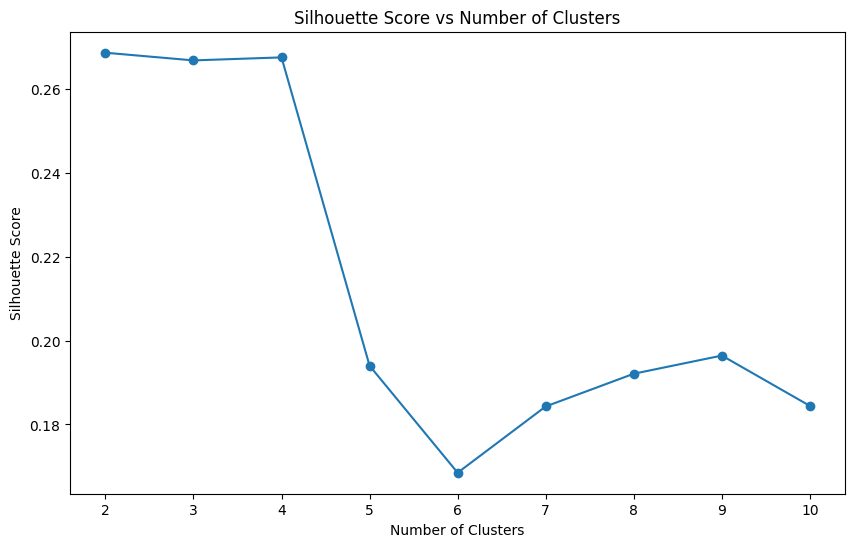

The best number of clusters is: 2


In [76]:
# The image below is not the final result, if yours looks different, that’s okay.

# Calculate silhouette scores for different numbers of clusters using Agglomerative Clustering
silhouette_scores = []
k_range = range(2, 11)

# Standardizing the DataFrame before clustering
df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

# Loop through the range of cluster numbers to calculate silhouette scores
for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df)

    # Calculate the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Determine the best number of clusters based on the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

# This process helps identify the optimal number of clusters by evaluating how well-separated the clusters are
# A higher silhouette score indicates better-defined clusters, assisting in making an informed decision for clustering

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [77]:
# agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_pred = agglo.fit_predict(df)

In [78]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df = pd.DataFrame(sc.inverse_transform(df), columns=df.columns)

df['Agglo'] = y_pred

# show the df
df.head(5)
# Show top 5 rows of the data

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2.0,1
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0.0,0


Display the cluster summary in the form of a dataframe.

In [79]:
cluster_summary_1 = df.groupby(y_pred).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max']
})

cluster_summary_1 = cluster_summary_1.rename_axis("Agglo")

cluster_summary_1
# Show cluster summary 1 (in form of dataframe)

Area Category           Luas Tanah (m2)                \
               mode  min  max            mean   min     max   
Agglo                                                         
0               2.0  1.0  4.0      280.412621  50.0  1561.0   
1               3.0  2.0  4.0      118.980392  14.0   495.0   

      Luas Bangunan (m2)               Jumlah Kamar             \
                    mean   min     max         mode  min   max   
Agglo                                                            
0             340.514563  75.0  1200.0          5.0  3.0  13.0   
1             117.588235  14.0   495.0          2.0  1.0   5.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                    4.0  1.0  13.0             2.0  1.0  4.0  
1                    2.0  1.0   4.0      [1.0, 2.0]  1.0  2.0

In [80]:
cluster_summary_2 = df.groupby(y_pred).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

cluster_summary_2 = cluster_summary_2.rename_axis("Agglo")

cluster_summary_2
# Show cluster summary 2 (in form of dataframe)

Harga Penawaran (dari Owner)                            Terjual/Belum  \
                              mean          min           max          mode   
Agglo                                                                         
0                     6.751048e+09  645000000.0  9.900000e+10           1.0   
1                     1.506754e+09  160000000.0  1.050000e+10           1.0   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                          mode  
Agglo                                                              
0                  3.0          2.0                           2.0  
1                  3.0          2.0                           2.0

In [81]:
df['Agglo'].value_counts().sort_index()

,count
Agglo,
0,206
1,102


In [82]:
# write down your interpretation from the cluster that you have been made

**Using KMeans, the data is divided into three distinct clusters, whereas Agglomerative Clustering (Agglo) results in only two clusters.**

**Agglo Cluster 0**: It represents properties with consistently higher prices, larger areas, and taller buildings (up to 4 floors), making them ideal for high-end buyers.

**Agglo Cluster 1**: It highlights budget-friendly properties with 1-2 floors, smaller sizes, and fewer rooms, catering to buyers looking for affordable options.

**Hierarchical Visualization**

Single Linkage

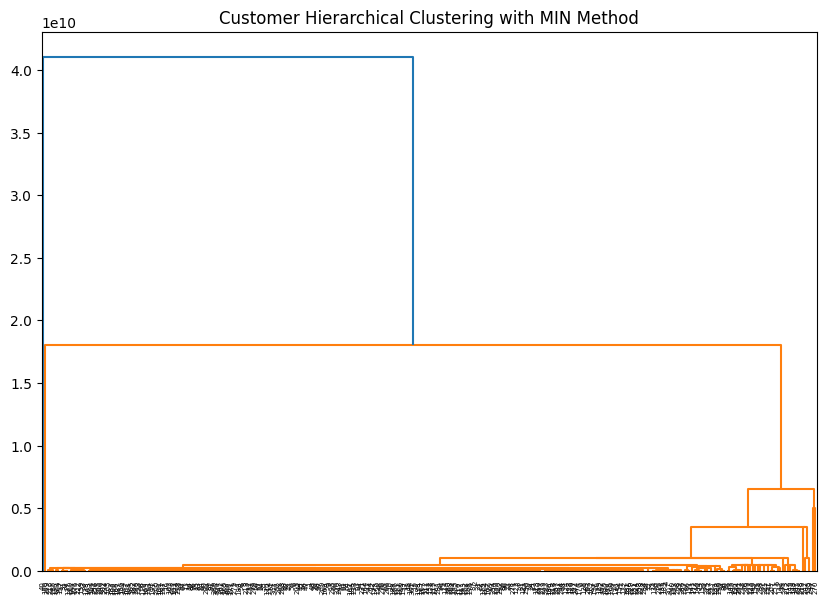

In [83]:
plt.figure(figsize=(10, 7))
plt.title("Customer Hierarchical Clustering with MIN Method")
dend = sch.dendrogram(sch.linkage(df, method='single'))

plt.show()
# Show dendogram with SINGLE LINKAGE

complete linkage

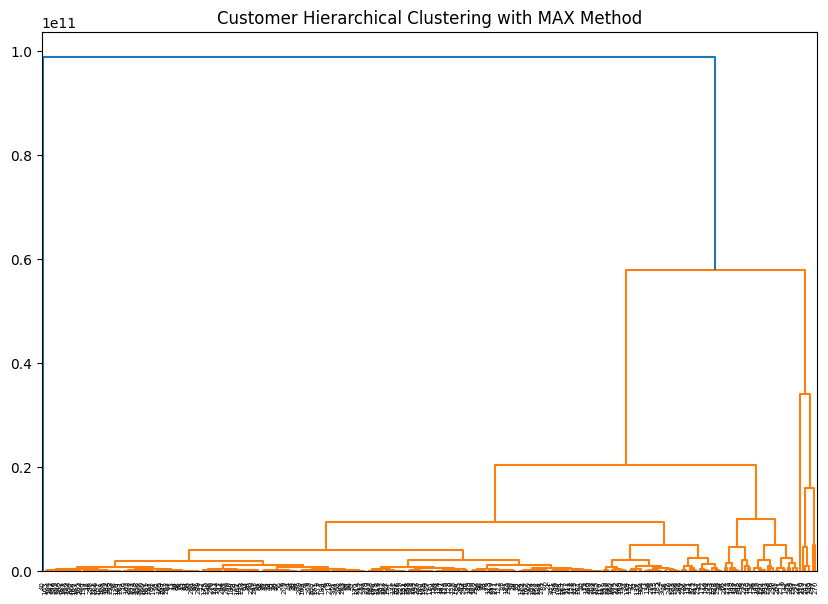

In [84]:
plt.figure(figsize=(10, 7))
plt.title("Customer Hierarchical Clustering with MAX Method")
dend = sch.dendrogram(sch.linkage(df, method='complete'))

plt.show()
# Show dendogram with COMPLETE LINKAGE

average linkage

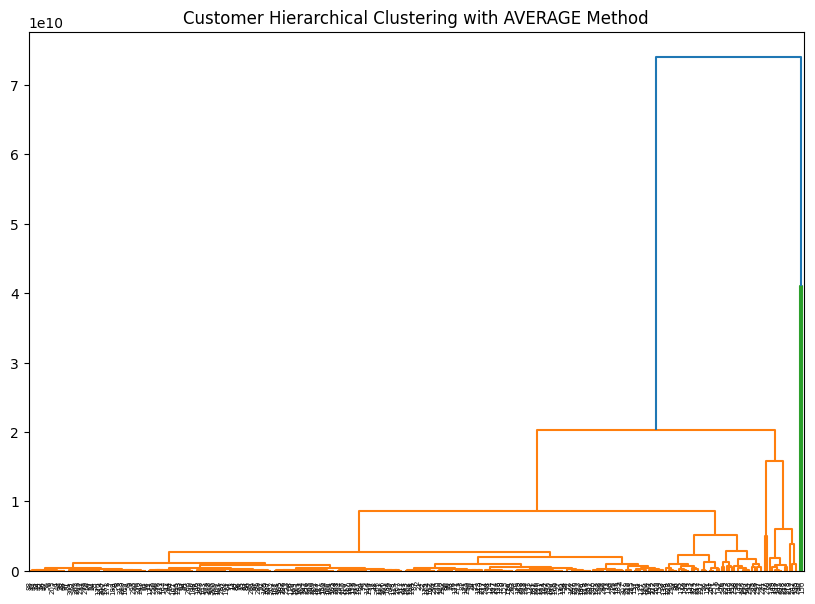

In [85]:
plt.figure(figsize=(10, 7))
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
dend = sch.dendrogram(sch.linkage(df, method='average'))

plt.show()
# Show dendogram with AVERAGE LINKAGE

ward method

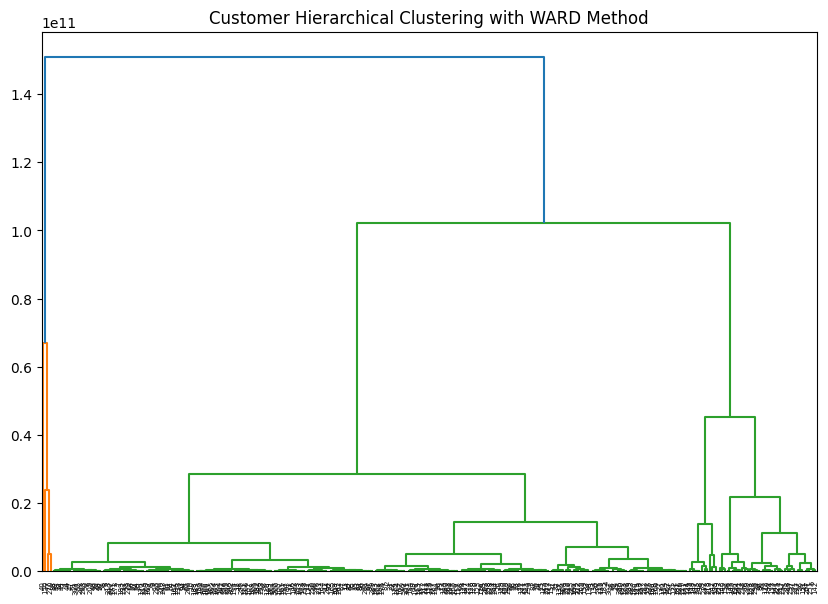

In [86]:
plt.figure(figsize=(10, 7))
plt.title("Customer Hierarchical Clustering with WARD Method")
dend = sch.dendrogram(sch.linkage(df, method='ward'))

plt.show()
# Show dendogram with WARD METHOD